# Forecast Airline Passenger Traffic

###### Problem Statement: Given airline passenger data (in months), forecast number of passengers that will board per a month in the future.
###### Breakdown: Build a model to forecast the demand (pasenger traffic). The data is classified in data/time and the passengers traveling per month.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/AirPassengers.csv')
dataset.head(20)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [3]:
# It can be inferred that we have data per month from year 1949.
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
dataset.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
indexed_data = dataset.set_index(['Month'])
indexed_data.head(12)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [7]:
# lets also look at data in the bottom
indexed_data.tail(12)

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


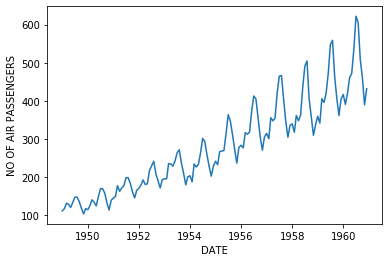

In [8]:
# plot gragh
plt.xlabel('DATE')
plt.ylabel('NO OF AIR PASSENGERS')
plt.plot(indexed_data)

In [ ]:
# observations: 
# Trend: There's a clear trend in the data
# Stationarity: Visually variance is increasing over the years (A good candidate to apply tranformation)

# Let us perform our checks for stationarity and not just depend on visual inference

### Stationarity Check
#### 1. Rolling Statistics

In [14]:
# Determine rolling statistics
rolling_mean = indexed_data.rolling(window=12).mean()

rolling_std = indexed_data.rolling(window=12).std()

print(rolling_mean,'\n-----------------------\n', rolling_std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns] 
-----------------------
             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


In [ ]:
# Plot rolling statistics
orig = plt.plot(indexed_data, label='Original', color='blue')
mean = plt.plot(rolling_mean, label='Rolling Mean', color='red')
std = plt.plot(rolling_std, label='Rolling Std', color='darkgreen')
plt.legend(loc='best')
